In [ ]:
import schemdraw as schem
import schemdraw.elements as e

d = schem.Drawing()
C1 = d.add(e.CAP, label='$C_1$')
C2 = d.add(e.CAP, d='down', label='$C_2$')
R1 = d.add(e.RES, d='right', label='$R_1$')
R2 = d.add(e.RES, d='right', label='$R_2$')
d.add(e.LINE, to=C1.start)
d.add(e.LINE, to=C2.start)
d.add(e.LINE, to=R1.start)
d.add(e.GND)
d.draw()

\begin{equation}
    L\frac{di}{dt} + Ri + \frac{1}{C}\int i\,dt = V
\end{equation}

\begin{equation}
LsI(s) + RI(s) + \frac{1}{Cs}I(s) = V(s)
\end{equation}

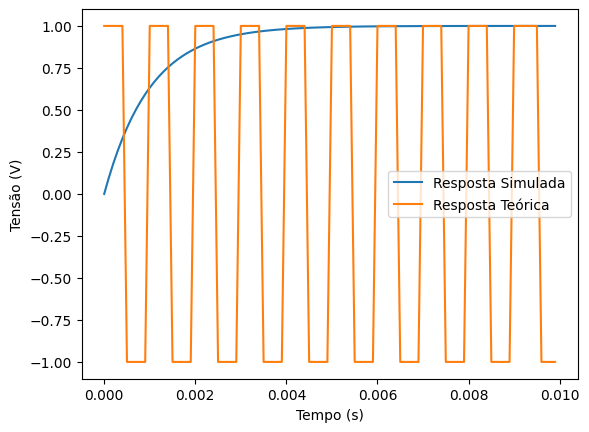

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control

# Definir os valores dos componentes do circuito e a função de entrada
R = 1000
C = 1e-6
Vin = signal.square(2 * np.pi * 1000 * np.arange(0, 0.01, 0.0001))

# Calcular a função transferência do sistema
s = control.TransferFunction.s
G = 1 / (R * C * s + 1)

# Criar o objeto TransferFunction usando a função transferência calculada
sys = control.TransferFunction(G.num, G.den)

# Simular o sistema e obter a resposta
t, y = control.step_response(sys, T=np.arange(0, 0.01, 0.0001))

# Plotar a resposta simulada e comparar com a resposta teórica
plt.plot(t, y)
plt.plot(t, Vin)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(['Resposta Simulada', 'Resposta Teórica'])
plt.show()